# Clustering Demo

In [1]:
#import the necessary libraries
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.model_selection import FeatureImportances

from zipfile import ZipFile

import seaborn as sns

plt.style.use('ggplot')

pd.set_option("display.max_columns", None)
print("Everything was loaded correctly")

Everything was loaded correctly


In [2]:
#Enter the password to access the data
str_pwd = input('Enter the password to access the data:  ')

Enter the password to access the data:  DX_Global


In [3]:
#open the encrypted zipfile
with ZipFile('clustering_file.zip') as zf:
    zf.extractall(pwd=bytes(str_pwd,'utf-8'))

In [4]:
#decrypt the file
df_data = pd.read_csv('clustering_file.csv')

#get list of features to use in visualizations
lst_features = df_data.columns.tolist()
print("data file was loaded correctly")

data file was loaded correctly


In [5]:
#View a sample of the data loaded in
df_data.head()

,AQUAFINA,BRISK,BUBLY,BUNDABERG,DIET PEPSI,FRAPPUCCINO,GATORADE,LIFEWTR,LIPTON,MOUNTAIN DEW,MOUNTAIN DEW CODE RED,MOUNTAIN DEW RISE,MUG,PEPSI,PEPSI ZERO SUGAR,ROCKSTAR,SIERRA MIST,STARBUCKS,STARBUCKS DBLE SHOT,3D DORITOS,BAKED LAY'S,BAKED RUFFLES,BEAN DIP,CHEESE FLAV SNKS CRUNCHY,CHEESE FLAV SNKS PUFFED,CHEETOS RED FAT,CHEETOS SWEET,CHESTERS HOT FRIES,CLEXTRL XTRUE VEGGIE PUF,CORN CHIPS,DR ROLLED TC (2012),KETTLE COOKED PC,MULTI PACK,ONION FLAVOR SNACKS,ORGANIC DORITOS,POPCORNERS,POPPED CHIPS/CRISPS,PORK RINDS,POTATO CHIPS,PRETZELS,PUR WHITE/DAIRY DIPS,PURCHASED CHS DIPS,PURCHASED TOSTITOS DIPS,RED ROCK DELI,RF REDUCED FAT NATURAL,ROUND TORTILLA CHIPS,SANTITAS CANTINA (WHT),SANTITAS TORTILLA CHP (5,SC 6GRAIN MEDLEY,SIMPLY CHEETOS CRUNCHY,SMART FOODS (POPCORN),SMPL CHEETOS ORGANIC,SNACK MIX,SUN CHIPS,TO RSTC NATURAL,TORTILLA CHIPS,TOSTITO MULTIGRAIN SCOOP,TOSTITO SCOOPS,TOSTITOS BITE SIZE,TOSTITOS CANTINA YELL CR,TOSTITOS EXTR THIN STYLE,TOSTITOS RESTAURANT,cv_act_listen_80s_music,cv_act_listen_alter_music,cv_act_listen_christian_music,cv_act_listen_classical_music,cv_act_listen_country_music,cv_act_listen_hiphop_music,cv_act_listen_jazz_music,cv_act_listen_music,cv_act_listen_oldies_music,cv_act_listen_pop_music,cv_act_listen_rock_music,cv_act_music_download,cv_act_music_stream,cv_lfstyl_freq_fly_pgm_mem,cv_lfstyl_have_grand_child,cv_lfstyl_high_freq_business_trav,cv_lfstyl_high_freq_cruise_enthus,cv_lfstyl_high_freq_domes_vacationer,cv_lfstyl_high_freq_forgn_vacationer,cv_lfstyl_hostel_guest_loyal_pgm,cv_lfstyl_interest_religion,cv_lfstyl_lf_insure_plcy_hldr,cv_lfstyl_med_insure_plcy_hldrs,cv_lfstyl_medicare_plcy_hldrs,cv_lfstyl_military_act,cv_lfstyl_military_inact,cv_memship_aarp_mem,cv_memship_union_mem,is_7_eleven_decile,is_ahold_delhaize_decile,is_albertsons_decile,is_aldi_decile,is_all_other_c_and_g_decile,is_all_other_club_decile,is_all_other_dollar_decile,is_all_other_drug_decile,is_all_other_grocery_decile,is_all_other_kroger_decile,is_all_other_mass_decile,is_all_other_walmart_decile,is_amazon_com_decile,is_bi_lo_decile,is_bjs_decile,is_circle_k_decile,is_costco_decile,is_cvs_decile,is_dollar_general_decile,is_family_dollar_decile,is_heb_decile,is_hy_vee_decile,is_kroger_banner_decile,is_publix_decile,is_sams_club_decile,is_speedway_decile,is_target_decile,is_trader_joes_decile,is_wakefern_decile,is_walgreens_decile,is_walmart_com_decile,is_whole_foods_decile,is_wm_neighborhood_market_decile,cv_act_avid_runners,cv_act_canoeing_kayaking,cv_act_fishing,cv_act_hunt_enthus,cv_act_mlb_enthus,cv_act_nascar_enthus,cv_act_nba_enthus,cv_act_nfl_enthus,cv_act_nhl_enthus,cv_act_outdoor_enthus,cv_act_pga_tour_enthus,cv_act_play_golf,cv_act_plays_hockey,cv_act_plays_soccer,cv_act_plays_tennis,cv_act_snow_sport,cv_act_sport_enthusiast,adaptogens_decile,alt_dairy_category_decile,antioxidant_attribute_decile,bodyarmor_decile,bottled_water_decile,breakfast_cereal_snack_bars_decile,bubly_decile,caffeine_attribute_decile,candy_category_decile,caramel_flavored_rtd_coffee_decile,chilled_tea_decile,coffee_flavored_rtd_coffee_decile,coffee_rtd_decile,cold_brew_decile,csd_multiserve_decile,csd_singles_decile,csd_total_decile,diet_csds_decile,easy_wellness_decile,energy_csd_zero_calorie_decile,energy_drinks_decile,experience_seekers_decile,familiar_but_seamless_decile,flavor_camp_aggregate_all_intense_bold_decile,flavor_camp_bbq_decile,flavor_camp_cheese_decile,flavor_camp_dairy_decile,flavor_camp_herb_spice_veggie_decile,flavor_camp_meat_decile,flavor_camp_salted_plain_decile,flavor_camp_spicy_burn_decile,flavor_camp_tangy_decile,flv_csd_ex_dew_pepper_decile,flv_salty_snacks_decile,frozen_bagels_decile,frozen_fruit_category_decile,health_warrior_decile,heat_and_eat_decile,herbal_tea_decile,instant_rice_pasta_grains_decile,izze_juice_decile,kevita_adjacencies_decile,kids_organic_decile,kombucha_functional_juices_decile,lemonade_decile,light_holiday_salty_snack_buyers_decile,lightly_salted_chips_decile,lite_snacks_decile,low_fat_salty_snacks

# How many clusters should we use?

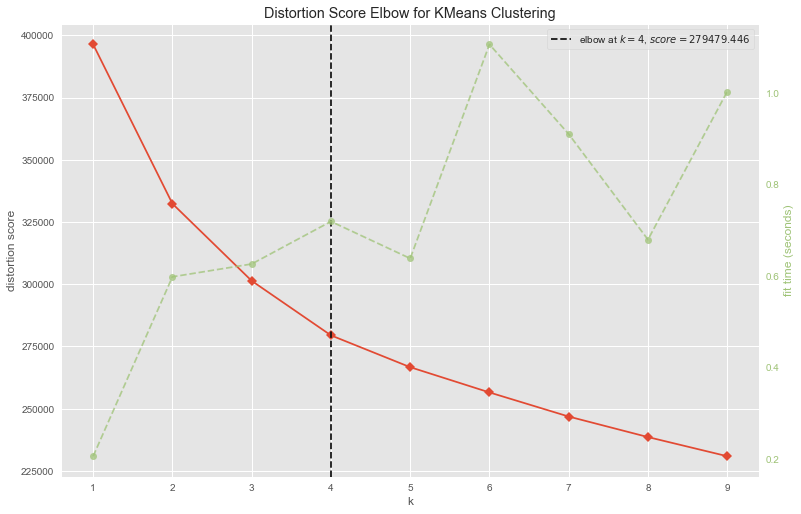

In [6]:
#how many clusters do you want to see on the list?
max_clusters=10

X = np.array(df_data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

visualizer = KElbowVisualizer(KMeans(), k=(1,max_clusters), size=(900,600))
visualizer.fit(X_scaled) # Fit the data to the visualizer
visualizer.show()  

# Run Clustering

In [21]:
#How many clusters do you want to view?
int_clusters = int(input('How many clusters do you want?  '))

How many clusters do you want?  4


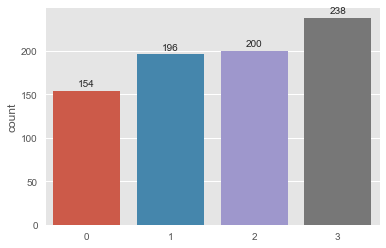

In [22]:
model = KMeans(n_clusters = int_clusters, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(X_scaled)

#show cluster count
ax = sns.countplot(y_clusters)
for p in ax.patches:
        ax.annotate('{:1}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

# View clusters

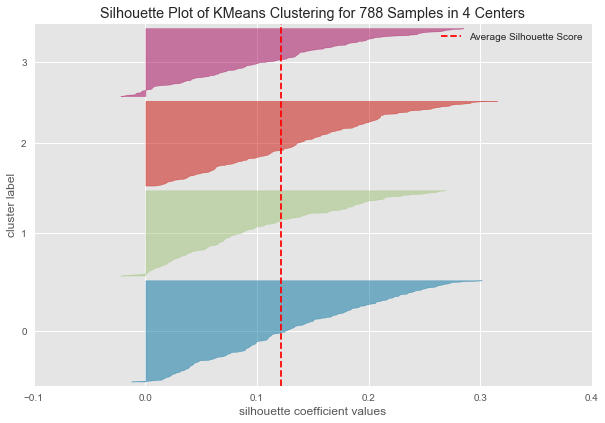

In [23]:
# Instantiate the clustering model and visualizer
model = KMeans(int_clusters)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick', size=(720,480))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

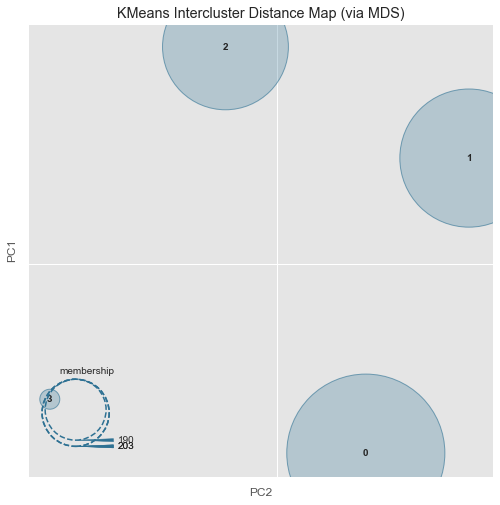

In [24]:
# Instantiate the clustering model and visualizer
model = KMeans(int_clusters)

visualizer = InterclusterDistance(model, size=(600,600))
visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# What features are important to the clusters

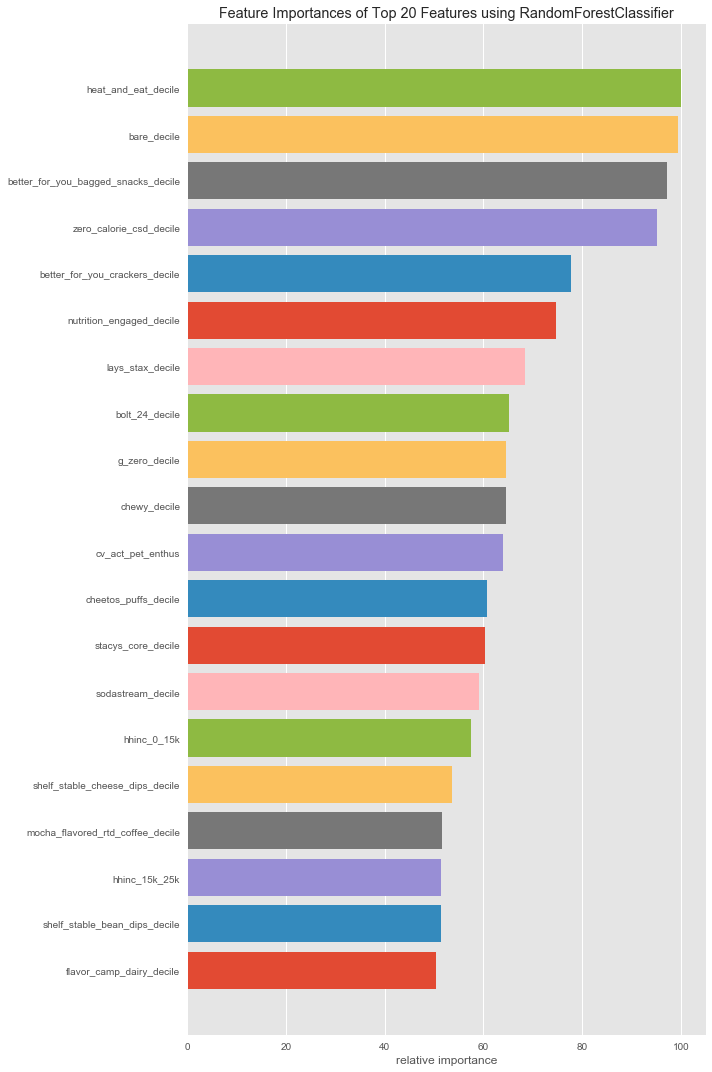

In [25]:
model = RandomForestClassifier(n_estimators=10, random_state=14)
viz = FeatureImportances(model, labels=lst_features, topn=20, size=(720,1080))
viz.fit(X_scaled, y_clusters)
viz.show()

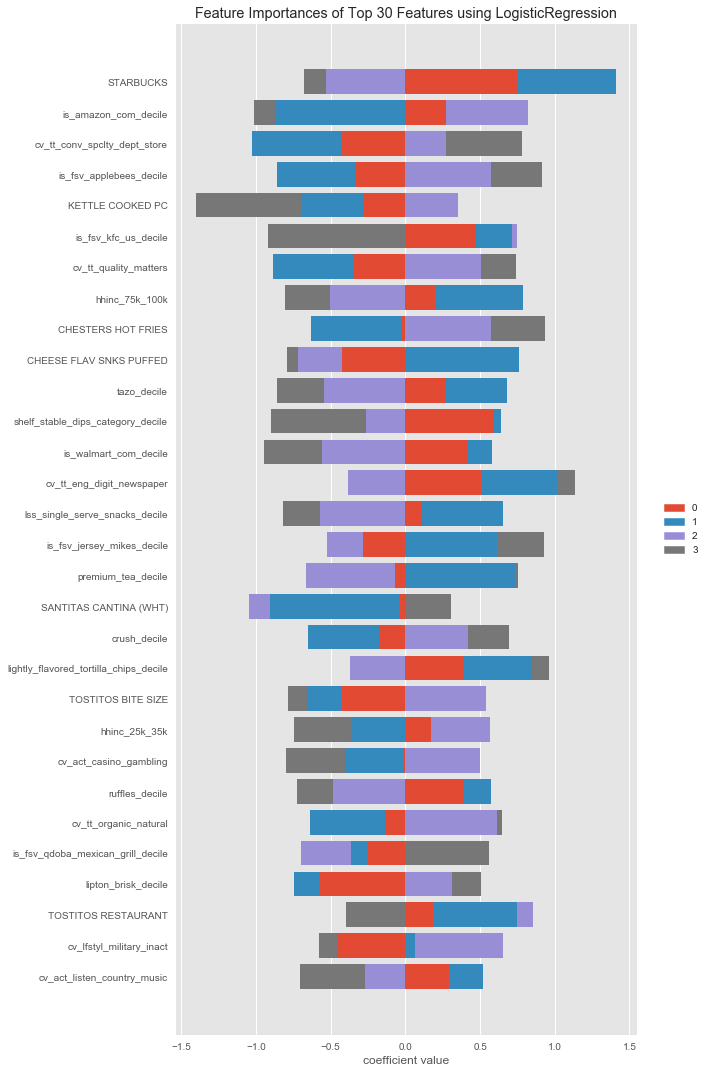

In [26]:
model = LogisticRegression(multi_class="auto", solver="liblinear")
viz = FeatureImportances(model, stack=True, labels=lst_features, relative=False, topn=30, size=(720,1080))
viz.fit(X_scaled, y_clusters)
viz.show()